In [1]:
from phosphorus import *
%config InteractiveShell.ast_node_interactivity='all'


             _    _                  _    _
            | |  | |                | |  | |
           _| |_ | |__   ___  ___  _| |_ | |__   ___  _ __ _   _  ____
          /     \| '_ \ / _ \/ __|/     \| '_ \ / _ \| '__| | | |/ ___)
         ( (| |) ) | | | (_) \__ ( (| |) ) | | | (_) | |  | |_| ( (__
          \_   _/|_| |_|\___/|___/\_   _/|_| |_|\___/|_|   \__,_|\__ \
            | |                     | |                            _) )
            |_|                     |_|                           (__/

        Welcome to the Phosphorus Meaning Engine v3
        Created by Ezra Keshet (EzraKeshet.com)




In [2]:
import ast
ast.dump(ast.parse('lambda x: x > 3 or (foo or bar)'))

"Module(body=[Expr(value=Lambda(args=arguments(posonlyargs=[], args=[arg(arg='x')], kwonlyargs=[], kw_defaults=[], defaults=[]), body=BoolOp(op=Or(), values=[Compare(left=Name(id='x', ctx=Load()), ops=[Gt()], comparators=[Constant(value=3)]), BoolOp(op=Or(), values=[Name(id='foo', ctx=Load()), Name(id='bar', ctx=Load())])])))], type_ignores=[])"

In [3]:
class Meaning4(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # PM
      case (beta, gamma) if m.quiet(  m[gamma].type == m[beta].type == Type.et ):
        rule = 'PM'
        value = 'lambda f : lambda g: lambda x: f(x) and g(x)'.et_et_et(m[beta])(m[gamma])

      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha

    return value, rule

m4 = Meaning4({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'Texas'   : 'T'.e,
    'in'      : 'lambda x: lambda y: IN(y,x)'.eet,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda x: GRAY(x)'.et,
})

m4['gray', 'cat']
m4['Kaline', [['gray', 'cat'], ['in', 'Texas']]]


 Interpreting ('gray', 'cat')
    Interpreting gray
    => gray = λx . GRAY(x) 	(TN)
    Interpreting cat
    => cat = λx . CAT(x) 	(TN)
 => ('gray', 'cat') = λx . GRAY(x) and CAT(x) 	(PM)


Function("lambda x: GRAY(x) and CAT(x)", Type(('e', 't')))


 Interpreting ('Kaline', [['gray', 'cat'], ['in', 'Texas']])
    Interpreting [['gray', 'cat'], ['in', 'Texas']]
       Interpreting ['gray', 'cat']
          Interpreting gray
          => gray = λx . GRAY(x) 	(TN)
          Interpreting cat
          => cat = λx . CAT(x) 	(TN)
       => ['gray', 'cat'] = λx . GRAY(x) and CAT(x) 	(PM)
       Interpreting ['in', 'Texas']
          Interpreting in
          => in = λx . λy . IN(y, x) 	(TN)
          Interpreting Texas
          => Texas = T 	(TN)
       => ['in', 'Texas'] = λy . IN(y, T) 	(FA)
    => [['gray', 'cat'], ['in', 'Texas']] = λx . (GRAY(x) and CAT(x)) and IN(x, T) 	(PM)
    Interpreting Kaline
    => Kaline = K 	(TN)
 => ('Kaline', [['gray', 'cat'], ['in', 'Texas']]) = (GRAY(K) and CAT(K)) and IN(K, T) 	(AF)


(GRAY(K) and CAT(K)) and IN(K, T)

In [4]:
class Meaning3(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha

    return value, rule

m3 = Meaning3({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda f: lambda x: f(x) and GRAY(x)'.et_et,
    'fond'    : 'lambda y: lambda f: lambda x: f(x) and FOND(x,y)'.eet_et,
})

#m3['Joe']
#m3['Kaline']
#m3['cat']
#m3['Kaline', 'cat']
m3[('a',)]
m3['a', 'cat']
m3['is', ['a', 'cat']]
m3['Kaline', [['fond', 'Joe'], ['gray', 'cat']]]
m3['Kaline', 'gray']


 Interpreting ('a',)
    Removing vacuous items: ['a']
 => () = None 	(NN)

 Interpreting ('a', 'cat')
    Removing vacuous items: ['a']
    Interpreting cat
    => cat = λx . CAT(x) 	(TN)
 => ('cat',) = λx . CAT(x) 	(NN)


Function("lambda x: CAT(x)", Type(('e', 't')))


 Interpreting ('is', ['a', 'cat'])
    Removing vacuous items: ['is']
    Interpreting ['a', 'cat']
       Removing vacuous items: ['a']
       Interpreting cat
       => cat = λx . CAT(x) 	(TN)
    => ('cat',) = λx . CAT(x) 	(NN)
 => (['a', 'cat'],) = λx . CAT(x) 	(NN)


Function("lambda x: CAT(x)", Type(('e', 't')))


 Interpreting ('Kaline', [['fond', 'Joe'], ['gray', 'cat']])
    Interpreting [['fond', 'Joe'], ['gray', 'cat']]
       Interpreting ['fond', 'Joe']
          Interpreting fond
          => fond = λy . λf . λx . f(x) and FOND(x, y) 	(TN)
          Interpreting Joe
          => Joe = J 	(TN)
       => ['fond', 'Joe'] = λf . λx . f(x) and FOND(x, J) 	(FA)
       Interpreting ['gray', 'cat']
          Interpreting gray
          => gray = λf . λx . f(x) and GRAY(x) 	(TN)
          Interpreting cat
          => cat = λx . CAT(x) 	(TN)
       => ['gray', 'cat'] = λx . CAT(x) and GRAY(x) 	(FA)
    => [['fond', 'Joe'], ['gray', 'cat']] = λx . (CAT(x) and GRAY(x)) and FOND(x, J) 	(FA)
    Interpreting Kaline
    => Kaline = K 	(TN)
 => ('Kaline', [['fond', 'Joe'], ['gray', 'cat']]) = (CAT(K) and GRAY(K)) and FOND(K, J) 	(AF)


(CAT(K) and GRAY(K)) and FOND(K, J)


 Interpreting ('Kaline', 'gray')
 => ('Kaline', 'gray') = ('Kaline', 'gray') 	(??)


('Kaline', 'gray')

In [5]:
m3.update({'is': 'lambda f: lambda x: f(lambda y:1)(x)'.et_et__et})

m3['gray']
m3['is', 'gray']


 Interpreting gray
 => gray = λf . λx . f(x) and GRAY(x) 	(TN)


Function("lambda f: lambda x: f(x) and GRAY(x)", Type((('e', 't'), ('e', 't'))))


 Interpreting ('is', 'gray')
    Interpreting is
    => is = λf . λx . f(lambda y: 1)(x) 	(TN)
    Interpreting gray
    => gray = λf . λx . f(x) and GRAY(x) 	(TN)
 => ('is', 'gray') = λx . 1 and GRAY(x) 	(FA)


Function("lambda x: 1 and GRAY(x)", Type(('e', 't')))

In [6]:
!pip install nltk
from nltk import Tree
!pip install svgling


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


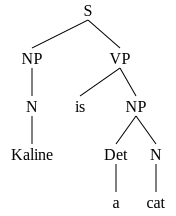


 Interpreting (S (NP (N Kaline)) (VP is (NP (Det a) (N cat))))


TypeError: unhashable type: 'Tree'

In [7]:
tree = Tree.fromstring('(S (NP (N Kaline)) (VP is (NP (Det a) (N cat))))')
tree
m3[tree]

In [ ]:
class Meaning3(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():# if alpha in m:
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha
    return value, rule

m = Meaning3({
    'Ann'     : 'A'.e,
    'smokes'  : 'lambda x: SMOKES(x)'.et,
    'tall'    : 'lambda x: TALL(x)'.et,
    'likes'   : 'lambda x: lambda y: LIKES(x,y)'.eet,
#    'is'      : None,
})

m['Ann']
m['smokes']
m['Ann', 'smokes']
m['smokes', 'Ann']


 Interpreting Ann
 => Ann = A 	(TN)


A


 Interpreting smokes
 => smokes = λx . SMOKES(x) 	(TN)


Function("lambda x: SMOKES(x)", Type(('e', 't')))


 Interpreting ('Ann', 'smokes')
    Interpreting smokes
    => smokes = λx . SMOKES(x) 	(TN)
    Interpreting Ann
    => Ann = A 	(TN)
 => ('Ann', 'smokes') = SMOKES(A) 	(AF)


SMOKES(A)


 Interpreting ('smokes', 'Ann')
    Interpreting smokes
    => smokes = λx . SMOKES(x) 	(TN)
    Interpreting Ann
    => Ann = A 	(TN)
 => ('smokes', 'Ann') = SMOKES(A) 	(FA)


SMOKES(A)

In [ ]:
m['tall', 'is']


 Interpreting ('tall', 'is')
    Removing vacuous items: ['is']
    Interpreting tall
    => tall = λx . TALL(x) 	(TN)
 => ('tall',) = λx . TALL(x) 	(NN)


Function("lambda x: TALL(x)", Type(('e', 't')))

In [ ]:
t = [1,2]
t = t - [1]

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
'lambda f:lambda x: f(x) and GRAY(x)'.et

ValueError: Invalid type for "lambda x: f(x) and GRAY(x)": 't'

Function("lambda f: lambda x: f(x) and GRAY(x)", Type(('e', 't')))

In [ ]:
'(lambda x: lambda y: lambda z: INTRODUCED(z,x,y))(S)'.eet

Function("lambda y: lambda z: INTRODUCED(z, S, y)", Type(('e', ('e', 't'))))

a. [λx.[λy.[λz.z introduced x to y]]](Ann)(Sue)

b. [λx.[λy.[λz.z introduced x to y](Ann)](Sue)]

c. [λx.[λy.[λz.z introduced x to y](Ann)]](Sue) 

d. [λx.[λy.[λz.z introduced x to y]](Ann)](Sue)

e. [λf.[λx.f(x)=1 and x is gray]]([λy.y is a cat])

f. [λg.[λx.g(x)(Ann)=1]]([λy.[λz.z saw y]])

g. [λm.[λn.n>3 and n<7](m)] 

h. [λm.[λn.[λo.o>3 and o<7](n)](m)] 

In [ ]:
'lambda g: (lambda x:g(x)(Ann))'.eet_et('lambda y:lambda z:SAW(z,y)'.eet)

'lambda m: lambda n:n>3 and m<7'.eet('3'.e)

Function("lambda x: SAW(Ann, x)", Type((('e', 't'), ('e', 't'))))

Function("lambda n: n > 3 and 3 < 7", Type(('e', 't')))

In [ ]:
catf = 'lambda y:CAT(y)'.et

ff = 'lambda f: lambda x: f(x) and GRAY(x)'.et_et
ff(catf)

gg = 'lambda f: f(A)'.eet_et
gg
gg('lambda x:lambda y:FOO(x,y)'.eet)

Function("lambda x: CAT(x) and GRAY(x)", Type(('e', 't')))

Function("lambda f: f(A)", Type(('e', (('e', 't'), ('e', 't')))))

Function("lambda y: FOO(A, y)", Type((('e', 't'), ('e', 't'))))

In [ ]:
Function('lambda y: CAT(y)', Type(('e', 't')))('x') and GRAY('x')

NameError: name 'GRAY' is not defined

In [ ]:
import ast
ast.dump(ast.parse('x smokes', mode= 'eval'))

SyntaxError: invalid syntax (<unknown>, line 1)